# EDA 2

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime, date, time

In [204]:
color_plot = '#9ad0ec'

## Load data

In [205]:
data_folder='../../data/'
df = pd.read_csv(data_folder + 'clean_complaint_data.csv', dtype={'CMPLNT_NUM': str})
pd.set_option('display.max_columns', None)
print(df.shape)

df.head()


(8893453, 40)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,geometry,District_Code,District_name,case_duration,year_begin
0,39468181,2008-02-20,07:00:00,2008-02-23,08:00:00,88.0,2008-02-23,107,BURGLARY,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),991818.0,191560.0,(null),UNKNOWN,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F,POINT (-73.972708 40.692464),302.0,Fort Greene/Brooklyn Hts,3.0,2008
1,50539499,2008-08-21,22:00:00,2008-08-21,23:00:00,19.0,2008-08-22,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UNATTENDED",COMPLETED,FELONY,MANHATTAN,FRONT OF,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0,(null),(null),(null),997152.0,220300.0,(null),(null),(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F,POINT (-73.953418 40.771341),108.0,Upper East Side,0.0,2008
2,45223390,2008-04-03,03:35:00,2008-04-03,03:50:00,77.0,2008-04-03,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,(null),(null),3360,1004579.0,183837.0,(null),(null),(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F,POINT (-73.926713 40.671245),308.0,Crown Heights North,0.0,2008
3,50594658,2008-08-19,09:00:00,NaN,(null),32.0,2008-08-27,341,PETIT LARCENY,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),999965.0,235630.0,(null),UNKNOWN,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M,POINT (-73.943226 40.813412),110.0,Central Harlem,inf,2008
4,44451016,2008-03-10,22:00:00,2008-03-10,22:10:00,67.0,2008-03-11,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,FRONT OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),999602.0,176145.0,<18,BLACK,M,NaN,40.650142,-73.944674,"(40.650142, -73.944674)",PATROL BORO BKLYN SOUTH,(null),25-44,BLACK,M,POINT (-73.944674 40.650142),317.0,East Flatbush,0.0,2008


In [206]:
# --- Larceny ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OTHER OFFENSES RELATED TO THEF', 'PETIT LARCENY')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('GRAND LARCENY OF MOTOR VEHICLE', 'GRAND LARCENY')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('PETIT LARCENY OF MOTOR VEHICLE', 'PETIT LARCENY')

# --- Harassment ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('HARRASSMENT 2', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('DISORDERLY CONDUCT', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('JOSTLING', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING/DEVIATE SEX', 'HARASSMENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FRAUDULENT ACCOSTING', 'HARASSMENT')

# --- Assault ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FELONY ASSAULT', 'ASSAULT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES AGAINST THE PERSON', 'ASSAULT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ASSAULT 3 & RELATED OFFENSES', 'ASSAULT')

# --- Drug Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CANNABIS RELATED OFFENSES', 'DANGEROUS DRUGS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING FOR DRUG PURPOSES', 'DANGEROUS DRUGS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('UNDER THE INFLUENCE OF DRUGS', 'DANGEROUS DRUGS')

# --- Weapons Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('UNLAWFUL POSS. WEAP. ON SCHOOL', 'DANGEROUS WEAPONS')

# --- Sex Crimes ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FELONY SEX CRIMES', 'SEX CRIMES')

# --- Fraud ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('FORGERY', 'FRAUDS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('THEFT-FRAUD', 'FRAUDS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES INVOLVING FRAUD', 'FRAUDS')

# --- Public Order Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ADMINISTRATIVE CODE', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ADMINISTRATIVE CODES', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('NEW YORK CITY HEALTH CODE', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('DISRUPTION OF A RELIGIOUS SERV', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES AGAINST PUBLIC SAFETY', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFFENSES AGAINST PUBLIC ADMINI', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OFF. AGNST PUB ORD SENSBLTY &', 'OFF. AGNST PUB ORDER')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('THEFT OF SERVICES', 'OFF. AGNST PUB ORDER')


# --- Traffic Offenses ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('INTOXICATED/IMPAIRED DRIVING', 'INTOXICATED & IMPAIRED DRIVING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('OTHER TRAFFIC INFRACTION', 'VEHICLE AND TRAFFIC LAWS')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('UNAUTHORIZED USE OF A VEHICLE', 'VEHICLE AND TRAFFIC LAWS')

# --- Burglary / Trespass ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CRIMINAL TRESPASS', 'BURGLARY')
df['OFNS_DESC'] = df['OFNS_DESC'].replace("BURGLAR'S TOOLS", 'BURGLARY')

# --- Homicide ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('HOMICIDE-NEGLIGENT,UNCLASSIFIE', 'HOMICIDE-NEGLIGENT')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('HOMICIDE-NEGLIGENT-VEHICLE', 'HOMICIDE-NEGLIGENT')

# --- Child-related ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('ENDAN WELFARE INCOMP', 'OFFENSES RELATED TO CHILDREN')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CHILD ABANDONMENT/NON SUPPORT', 'OFFENSES RELATED TO CHILDREN')

# --- Optional Cleanup (remove or recode nulls) ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('(null)', 'UNKNOWN')

# --- Kidnapping ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('KIDNAPPING & RELATED OFFENSES', 'KIDNAPPING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('KIDNAPPING AND RELATED OFFENSES', 'KIDNAPPING')

# --- Others ---
df['OFNS_DESC'] = df['OFNS_DESC'].replace('PROSTITUTION & RELATED OFFENSES', 'PROSTITUTION')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('CRIMINAL MISCHIEF & RELATED OF', 'CRIMINAL MISCHIEF')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING/GAMBLING (CARDS, DIC', 'GAMBLING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING', 'GAMBLING')
df['OFNS_DESC'] = df['OFNS_DESC'].replace('LOITERING (BEGGING)', 'GAMBLING')

df['OFNS_DESC'] = df['OFNS_DESC'].replace({
    'PETIT LARCENY': 'Minor Theft',
    'GRAND LARCENY': 'Major Theft',
    'POSSESSION OF STOLEN PROPERTY': 'Stolen Property Possession',
    'ASSAULT': 'Physical Assault',
    'HARASSMENT': 'Verbal or Physical Harassment',
    'CRIMINAL MISCHIEF': 'Vandalism',
    'OFF. AGNST PUB ORDER': 'Public Disturbance',
    'DANGEROUS DRUGS': 'Drug Offenses',
    'DANGEROUS WEAPONS': 'Weapon Possession',
    'VEHICLE AND TRAFFIC LAWS': 'Traffic Violations',
    'BURGLARY': 'Breaking & Entering',
    'FRAUDS': 'Fraud and Forgery',
    'SEX CRIMES': 'Sexual Offenses',
    'RAPE': 'Rape',
    'ARSON': 'Intentional property fire',
    'MURDER & NON-NEGL. MANSLAUGHTER': 'Murder',
    'HOMICIDE-NEGLIGENT': 'Negligent Homicide',
    'GAMBLING': 'Illegal Gambling',
    'KIDNAPPING': 'Kidnapping',
    'OFFENSES RELATED TO CHILDREN': 'Child Abuse/Endangerment',
    'PROSTITUTION': 'Prostitution Offenses'
})

keep_offenses = [
    'Minor Theft',
    'Major Theft',
    'Stolen Property Possession',
    'Physical Assault',
    'Verbal or Physical Harassment',
    'Vandalism',
    'Public Disturbance',
    'Drug Offenses',
    'Weapon Possession',
    'Traffic Violations',
    'Breaking & Entering',
    'Theft with Force',
    'Fraud and Forgery',
    'Rape',
    'Intentional property fire',
    'Murder',
    'Negligent Homicide',
    'Illegal Gambling',
    'Kidnapping',
    'Child Abuse/Endangerment',
    'Prostitution Offenses'
]

df = df[df['OFNS_DESC'].isin(keep_offenses)]
print(df.shape)
df.head()

(8090055, 40)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,geometry,District_Code,District_name,case_duration,year_begin
0,39468181,2008-02-20,07:00:00,2008-02-23,08:00:00,88.0,2008-02-23,107,Breaking & Entering,221.0,"BURGLARY,RESIDENCE,DAY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0,(null),(null),(null),991818.0,191560.0,(null),UNKNOWN,(null),NaN,40.692464,-73.972708,"(40.692464, -73.972708)",PATROL BORO BKLYN NORTH,(null),25-44,WHITE,F,POINT (-73.972708 40.692464),302.0,Fort Greene/Brooklyn Hts,3.0,2008
1,50539499,2008-08-21,22:00:00,2008-08-21,23:00:00,19.0,2008-08-22,109,Major Theft,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UNATTENDED",COMPLETED,FELONY,MANHATTAN,FRONT OF,BAR/NIGHT CLUB,N.Y. POLICE DEPT,0,(null),(null),(null),997152.0,220300.0,(null),(null),(null),NaN,40.771341,-73.953418,"(40.771341, -73.953418)",PATROL BORO MAN NORTH,(null),45-64,WHITE HISPANIC,F,POINT (-73.953418 40.771341),108.0,Upper East Side,0.0,2008
2,45223390,2008-04-03,03:35:00,2008-04-03,03:50:00,77.0,2008-04-03,106,Physical Assault,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,2,(null),(null),3360,1004579.0,183837.0,(null),(null),(null),NaN,40.671245,-73.926713,"(40.671245, -73.926713)",PATROL BORO BKLYN NORTH,(null),25-44,BLACK,F,POINT (-73.926713 40.671245),308.0,Crown Heights North,0.0,2008
3,50594658,2008-08-19,09:00:00,NaN,(null),32.0,2008-08-27,341,Minor Theft,349.0,"LARCENY,PETIT OF LICENSE PLATE",COMPLETED,MISDEMEANOR,MANHATTAN,FRONT OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),999965.0,235630.0,(null),UNKNOWN,(null),NaN,40.813412,-73.943226,"(40.813412, -73.943226)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,M,POINT (-73.943226 40.813412),110.0,Central Harlem,inf,2008
5,49918184,2008-08-08,01:30:00,2008-08-08,01:34:00,34.0,2008-08-08,355,Physical Assault,115.0,RECKLESS ENDANGERMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,OPPOSITE OF,STREET,N.Y. POLICE DEPT,0,(null),(null),(null),1003778.0,250869.0,(null),(null),(null),NaN,40.855233,-73.929406,"(40.855233, -73.929406)",PATROL BORO MAN NORTH,(null),(null),UNKNOWN,E,POINT (-73.929406 40.855233),112.0,Washington Heights,0.0,2008


In [207]:
df_eco=pd.read_csv(data_folder+'eco_data.csv')
df_eco.head()

,District,Year,individuals_below_FPL,Employement_pop_ratio,District_Code
0,Astoria,2005,0.18347,0.593,401
1,Astoria,2006,0.17182,0.592,401
2,Astoria,2007,0.16717,0.603,401
3,Astoria,2008,0.16424,0.638,401
4,Astoria,2009,0.15914,0.608,401


## Crime situation

In [208]:
import plotly.express as px
import pandas as pd

# Create offense type percentage DataFrame
offense_percentage = (df['OFNS_DESC'].value_counts(normalize=True) * 100).reset_index()
offense_percentage.columns = ['Offense Type', 'Percentage']

# Create bar chart
fig = px.bar(
    offense_percentage,
    x='Offense Type',
    y='Percentage',
    title='Offense Type Repartition',
    labels={'Percentage': 'Percentage of Complaints (%)'},
    hover_data={'Percentage': ':.2f'},
)

fig.update_traces(marker_color=color_plot)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_tickfont_size=12,
    yaxis_title_font=dict(size=14),
    xaxis_title_font=dict(size=12),
    title_font=dict(size=18),
    plot_bgcolor='white',
    yaxis_gridcolor='lightgray',
    yaxis=dict(tickfont=dict(size=14)),
)

fig.show()

fig.write_html("../images/offense_type_repartition.html")


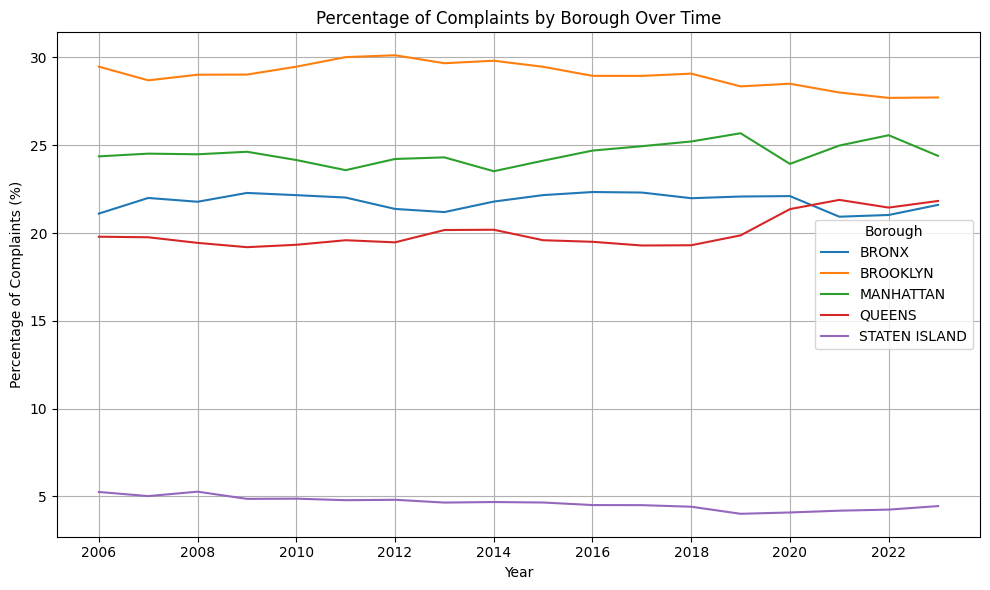

In [209]:
import matplotlib.ticker as mticker

df_clean = df[df['BORO_NM'] != '(null)']


# Group by year and borough, then count complaints
complaints_per_year_boro = df_clean.groupby(['year_begin', 'BORO_NM']).size().unstack(fill_value=0)
complaints_percent = complaints_per_year_boro.div(complaints_per_year_boro.sum(axis=1), axis=0) * 100

# Plot
plt.figure(figsize=(10, 6))
for boro in complaints_percent.columns:
    plt.plot(complaints_percent.index, complaints_percent[boro], label=boro)

plt.title('Percentage of Complaints by Borough Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Complaints (%)')
plt.legend(title='Borough')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

In [210]:
import plotly.express as px
import pandas as pd

# Prepare hour data
hours = df['CMPLNT_FR_TM'].str[:2]
hours = hours[~(hours == '(n')]  # Remove nulls
hour_counts = hours.value_counts().sort_index()
hour_df = pd.DataFrame({'Hour': hour_counts.index, 'Count': hour_counts.values.astype(int)})
hour_df['Hour'] = hour_df['Hour'].astype(int)

# Sort by hour
hour_df = hour_df.sort_values('Hour')

# Plotly bar chart
fig = px.bar(
    hour_df,
    x='Hour',
    y='Count',
    labels={'Count': 'Number of Complaints', 'Hour': 'Hour of Day'},
    title='Reported Crime by Hour of Day',
    text='Count'
)

fig.update_layout(
    plot_bgcolor='white',
    title_x=0.5,
    yaxis_title="Number of Complaints",
    xaxis=dict(
        tickmode='linear',
        dtick=1
    )
)
fig.update_traces(marker_color=color_plot, texttemplate='%{text}', textposition='outside')

fig.show()
fig.write_html("../images/crime_by_hour.html")


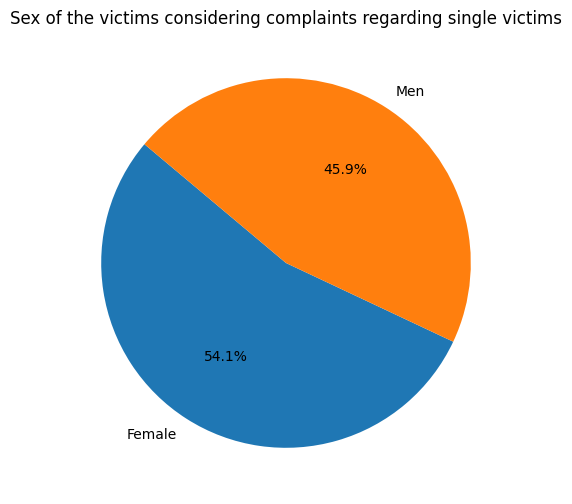

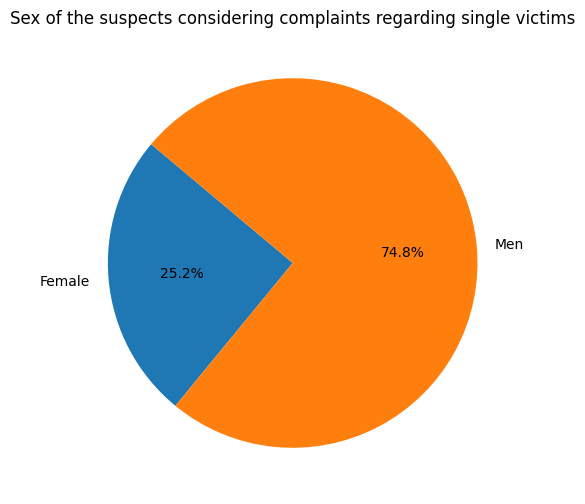

In [211]:
df_gender = df.query("(VIC_SEX == 'F')| (VIC_SEX =='M')")

labels= ["Female", "Men"]
sizes = [df_gender['VIC_SEX'].value_counts().get('F', 0),
         df_gender['VIC_SEX'].value_counts().get('M', 0)]


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sex of the victims considering complaints regarding single victims')
plt.show()

df_gender_susp = df[df['SUSP_SEX'].isin(['F', 'M'])]

labels= ["Female", "Men"]
sizes = [df_gender_susp['SUSP_SEX'].value_counts().get('F', 0),
         df_gender_susp['SUSP_SEX'].value_counts().get('M', 0)]


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Sex of the suspects considering complaints regarding single victims')
plt.show()

rgb(110,150,255)
rgb(110,150,255)
rgb(112,153,243)
rgb(112,153,243)
rgb(114,156,232)
rgb(114,156,232)
rgb(116,160,221)
rgb(118,163,210)
rgb(118,163,210)
rgb(121,166,199)
rgb(123,170,188)
rgb(123,170,188)
rgb(123,170,188)
rgb(125,173,177)
rgb(125,173,177)
rgb(125,173,177)
rgb(125,173,177)
rgb(127,176,166)
rgb(127,176,166)
rgb(130,180,155)


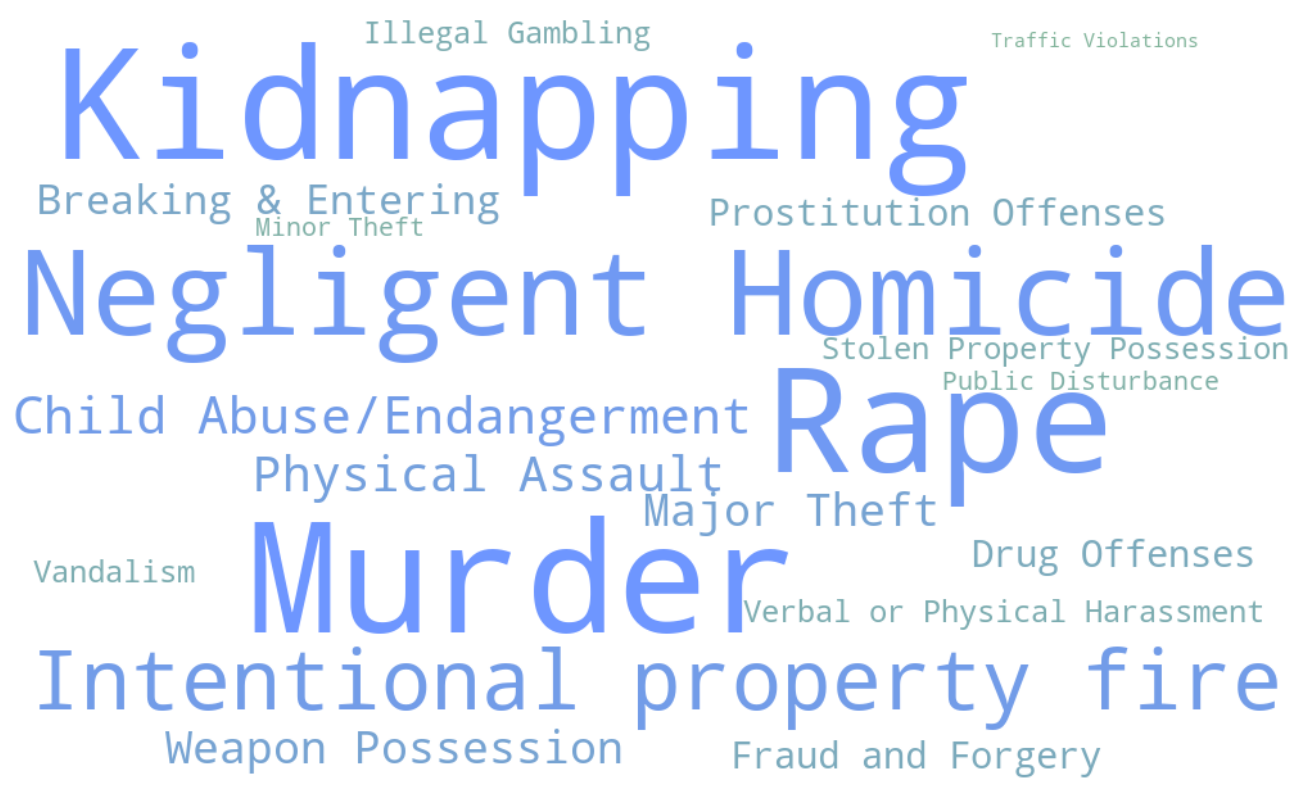

Plot saved at /Users/elsa/EPFL/MA4/Data_vis/BluePink/images/crime_type.png


In [212]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

# Severity scores
severity = {
    'Breaking & Entering': 5,
    'Major Theft': 6,
    'Physical Assault': 7,
    'Minor Theft': 2,
    'Verbal or Physical Harassment': 3,
    'Weapon Possession': 6,
    'Vandalism': 3,
    'Fraud and Forgery': 4,
    'Drug Offenses': 4,
    'Public Disturbance': 2,
    'Traffic Violations': 1,
    'Rape': 9,
    'Intentional property fire': 8,
    'Illegal Gambling': 3,
    'Kidnapping': 10,
    'Stolen Property Possession': 3,
    'Child Abuse/Endangerment': 8,
    'Prostitution Offenses': 4,
    'Negligent Homicide': 9,
    'Murder': 10
}

# Color function: black (low severity) to red (high severity)
def black_to_red(word):
    score = severity.get(word, 1)
    t = (score - 1) / 9  # min=1, max=10
    r = int(255 * t)
    return f"rgb({r},0,0)" 

def black_to_pastel_blue(word):
    score = severity.get(word, 1)
    t = (score - 1) / 9 

    # Start from very light blue and increase slightly in blue saturation
    r = int(130 - 20 * t)  
    g = int(180 - 30 * t)  
    b = int(255 - 100 * (1 - t))  
    print(f"rgb({r},{g},{b})")
    return f"rgb({r},{g},{b})"



# Create word cloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color='white',
    max_font_size=120,
    prefer_horizontal=1.0,
    color_func=black_to_pastel_blue
).generate_from_frequencies(severity)

output_path = "../images/crime_type.png"
abs_path = os.path.abspath(output_path)

# Display it
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.savefig(abs_path)
plt.show()

print(f"Plot saved at {abs_path}")



In [213]:
rape_df = df[df['OFNS_DESC'] == 'Rape']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of rape complaints per year:", average_rape_per_year)

rape_df = df[df['OFNS_DESC'] == 'Murder']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of murder complaints per year:", average_rape_per_year)

rape_df = df[df['OFNS_DESC'] == 'Intentional property fire']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of intentional property fire complaints per year:", average_rape_per_year)

rape_df = df[df['OFNS_DESC'] == 'Kidnapping']
rape_counts_per_year = rape_df.groupby('year_begin').size()
average_rape_per_year = rape_counts_per_year.mean()
print("Average number of kidnapping complaints per year:", average_rape_per_year)



Average number of rape complaints per year: 1398.2222222222222
Average number of murder complaints per year: 411.3333333333333
Average number of intentional property fire complaints per year: 1085.0555555555557
Average number of kidnapping complaints per year: 186.27777777777777


In [214]:
import plotly.express as px
import pandas as pd

# Filter out null boroughs
df_clean = df[df['BORO_NM'] != '(null)']

# Count complaints per borough
sizes = df_clean['BORO_NM'].value_counts().reset_index()
sizes.columns = ['Borough', 'Count']

colors = ['#a8dadc', '#457b9d', '#74c69d', '#b5ead7', '#9ad0ec']

# Create pie chart
fig = px.pie(
    sizes,
    names='Borough',
    values='Count',
    color_discrete_sequence=colors,
    hole=0.4  

fig.update_traces(
    textinfo='percent',  
    pull=[0.02] * len(sizes),
    textfont_size=10
)

# Layout tuning
fig.update_layout(
    title_text="Complaints by Borough",
    title_font=dict(size=12),
    title_x=0.5,
    showlegend=True,  
    margin=dict(t=30, b=30, l=10, r=10),
    width=350,
    height=350
)

fig.write_html("../images/borough_complaints_pie.html")
fig.show()


In [215]:
import plotly.graph_objects as go
import pandas as pd

# Clean and prepare data
df_clean = df[df['BORO_NM'] != '(null)']
sizes = df_clean['BORO_NM'].value_counts().reset_index()
sizes.columns = ['Borough', 'Count']

sizes["Population"] = sizes['Borough'].map({
    'BROOKLYN': 2679620,
    'QUEENS': 2388864,
    'MANHATTAN': 1645867,
    'BRONX': 1356476,
    'STATEN ISLAND': 492925
})

sizes["Population %"] = (sizes["Population"] / sizes["Population"].sum()) * 100
sizes_sorted = sizes.sort_values("Population", ascending=True)

# Create figure from the Bar trace
fig = go.Figure(
    data=go.Bar(
        x=sizes_sorted['Population'],
        y=sizes_sorted['Borough'],
        orientation='h',
        marker_color='#457b9d',
        text=[f"{pop:,.0f} ({pct:.1f}%)" for pop, pct in zip(sizes_sorted['Population'], sizes_sorted['Population %'])],
        hovertemplate='<b>%{y}</b><br>Population: %{text}<extra></extra>'
    )
)

fig.update_layout(
    height=300,
    width=400,
    title_x=0.5,
    title_text="Population by Borough",
    plot_bgcolor='white',
    xaxis_title="Population",
    yaxis_title="Borough",
    margin=dict(t=50, r=30, l=30),
    title_font=dict(size=14)
)

fig.write_html("../images/population_bar.html")
fig.show()


In [217]:
Brooklyn= 2679620
Queens= 2388864
Manhattan= 1645867
Bronx= 1356476
Staten_Island=492925

total_pop = Brooklyn + Queens + Manhattan + Bronx + Staten_Island
Staten_Island_perc = Staten_Island / total_pop * 100
Brooklyn_perc = Brooklyn / total_pop * 100
Queens_perc = Queens / total_pop * 100
Manhattan_perc = Manhattan / total_pop * 100
Bronx_perc = Bronx / total_pop * 100
print(f"Brooklyn population percentage: {Brooklyn_perc:.2f}%")
print(f"Queens population percentage: {Queens_perc:.2f}%")
print(f"Manhattan population percentage: {Manhattan_perc:.2f}%")
print(f"Bronx population percentage: {Bronx_perc:.2f}%")
print(f"Staten Island population percentage: {Staten_Island_perc:.2f}%")

Brooklyn population percentage: 31.29%
Queens population percentage: 27.90%
Manhattan population percentage: 19.22%
Bronx population percentage: 15.84%
Staten Island population percentage: 5.76%


In [218]:
sizes["Population"] = sizes['Borough'].map({
    'BROOKLYN': Brooklyn,
    'QUEENS': Queens,
    'MANHATTAN': Manhattan,
    'BRONX': Bronx,
    'STATEN ISLAND': Staten_Island
})


In [220]:
sizes.Count.corr(sizes.Population)
from scipy import stats
pearson = stats.pearsonr(sizes['Count'],sizes['Population'])
print(f"Pearson correlation has a coefficient of {pearson[0]:.3} with a p-value of {pearson[1]:.3}.")

Pearson correlation has a coefficient of 0.829 with a p-value of 0.0829.


## Time evolution

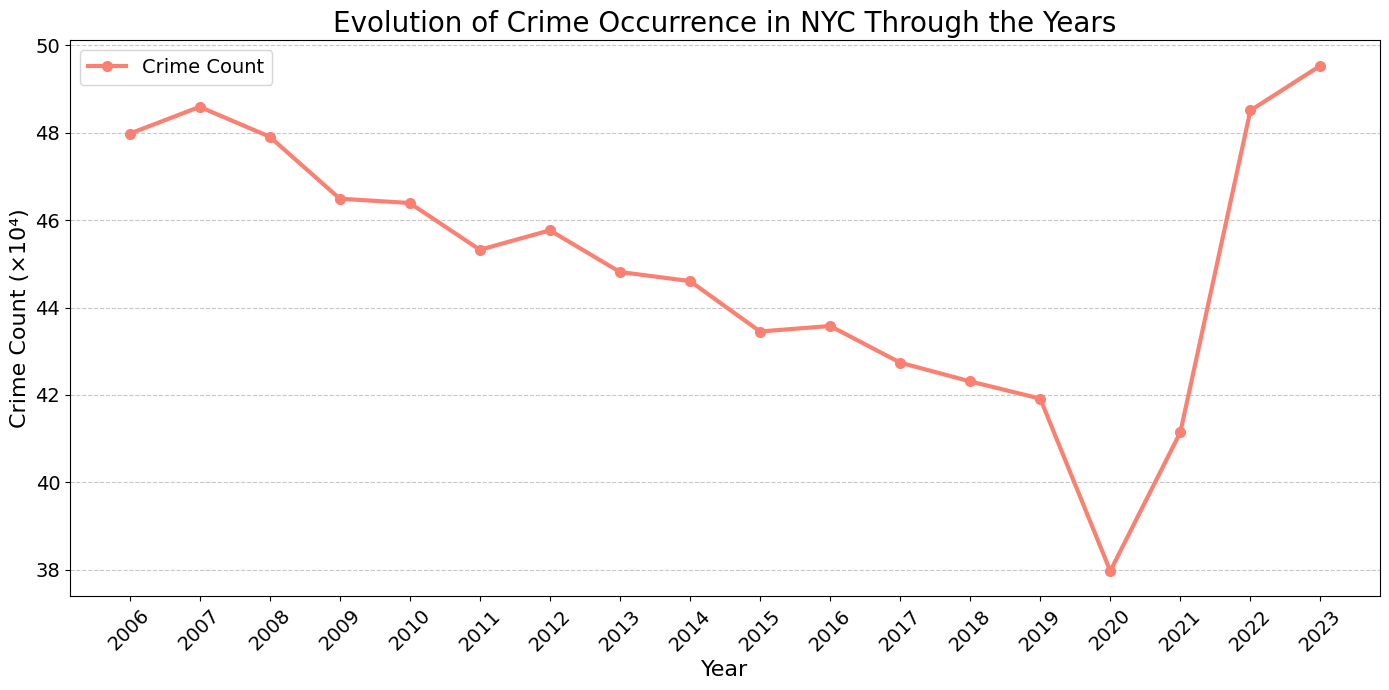

In [221]:
df_year = df.groupby('year_begin').agg(
    nb_crimes=('year_begin', 'size')
).reset_index()

#Crop from 2006 not enough data
df_year = df_year.query("year_begin >= 2006")


plt.figure(figsize=(14, 7))

plt.plot(df_year["year_begin"], df_year["nb_crimes"] / 1e4,
         marker='o', linestyle='-', color='salmon', linewidth=3, markersize=7, label='Crime Count')

# X-axis labels: show every year, rotate for readability
plt.xticks(df_year["year_begin"], rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# Labels and title with larger font sizes
plt.xlabel("Year", fontsize=16)
plt.ylabel("Crime Count (×10⁴)", fontsize=16)
plt.title("Evolution of Crime Occurrence in NYC Through the Years", fontsize=20)

# Grid and optional legend
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()


## Most dangerous districts

In [223]:
data_district_df = pd.read_csv("../../data/data_district_df.csv")

In [224]:

data_district_df["Crime_Rank"] = data_district_df["total_crimes"].rank(ascending=False, method='min').astype(int)
data_district_df["Employ_Rank"] = (
    data_district_df["Employement_pop_ratio_mean"]
    .rank(ascending=False, method='min')
    .fillna(-1)  # Optional: mark missing with -1 or another indicator
    .astype(int)
)

data_district_df["FPL_Rank"] = data_district_df["individuals_below_FPL_mean"].rank(ascending=True, method='min').fillna(-1).astype(int)

In [225]:
data_district_df.sort_values(by= "total_crimes", ascending=False)[:3]

,District_Code,main_crimes,total_crimes,District,individuals_below_FPL_median,individuals_below_FPL_mean,individuals_below_FPL_std,Employement_pop_ratio_median,Employement_pop_ratio_mean,Employement_pop_ratio_std,Crime_Rank,Employ_Rank,FPL_Rank
4,105,"{'Minor Theft': 111045, 'Major Theft': 73979, 'Physical Assault': 27720, 'Harassment': 24932, 'Public Disturbance': 15984}",309151,Midtown Business District,0.13027,0.127174,0.015678,0.7075,0.677218,0.123798,1,7,18
59,412,"{'Physical Assault': 49371, 'Minor Theft': 41132, 'Harassment': 36859, 'Vandalism': 29008, 'Major Theft': 26228}",261626,Jamaica/St. Albans,0.13156,0.137926,0.026787,0.5790,0.579412,0.022826,2,24,21
32,305,"{'Physical Assault': 51265, 'Minor Theft': 36468, 'Harassment': 35609, 'Vandalism': 27347, 'Major Theft': 23535}",251024,East New York,0.28431,0.277157,0.041395,0.5120,0.507765,0.034604,3,52,47


In [ ]:
# Replace -1 with NaN for filtering
data_district_df["Employ_Rank"] = data_district_df["Employ_Rank"].replace(-1, np.nan)

sorted_df = data_district_df.sort_values(by="total_crimes", ascending=False)

# Now get first, middle, last
first = sorted_df.iloc[0]
middle = sorted_df.iloc[len(sorted_df) // 2]
last = sorted_df.iloc[-1]

result_df = sorted_df.iloc[[0, len(sorted_df) // 2, -1]]


In [227]:
pd.set_option('display.max_colwidth', None)

result_df.head()

,District_Code,main_crimes,total_crimes,District,individuals_below_FPL_median,individuals_below_FPL_mean,individuals_below_FPL_std,Employement_pop_ratio_median,Employement_pop_ratio_mean,Employement_pop_ratio_std,Crime_Rank,Employ_Rank,FPL_Rank
4,105,"{'Minor Theft': 111045, 'Major Theft': 73979, 'Physical Assault': 27720, 'Harassment': 24932, 'Public Disturbance': 15984}",309151,Midtown Business District,0.13027,0.127174,0.015678,0.7075,0.677218,0.123798,1,7.0,18
35,308,"{'Physical Assault': 20252, 'Harassment': 16682, 'Minor Theft': 16625, 'Drug Offenses': 12354, 'Vandalism': 11708}",109430,Crown Heights North,0.23809,0.230166,0.038329,0.5950,0.600412,0.040637,36,17.0,38
66,484,"{'Vandalism': 43, 'Major Theft': 32, 'Minor Theft': 27, 'Harassment': 26, 'Physical Assault': 24}",197,Jamaica Bay Park,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,-1


In [228]:
#see main crimes of Flatbush/Midwood	
flatbush_midwood = data_district_df[data_district_df['District'] == 'Flatbush/Midwood']
print(flatbush_midwood.main_crimes)

41    {'Minor Theft': 24210, 'Physical Assault': 21604, 'Harassment': 16273, 'Major Theft': 13942, 'Vandalism': 12367}
Name: main_crimes, dtype: object


In [229]:
data_district_df["Employ_Rank"] = data_district_df["Employ_Rank"].replace(-1, np.nan)
data_district_df["FPL_Rank"] = data_district_df["FPL_Rank"].replace(-1, np.nan)

sorted_df = data_district_df.sort_values(by="FPL_Rank", ascending=True)

#drop nan
sorted_df = sorted_df.dropna(subset=["Employ_Rank", "FPL_Rank"])
# Now get first, middle, last
first = sorted_df.iloc[0]
middle = sorted_df.iloc[len(sorted_df) // 2]
last = sorted_df.iloc[-1]

result_df = sorted_df.iloc[[0, len(sorted_df) // 2, -1]]
result_df.head()

,District_Code,main_crimes,total_crimes,District,individuals_below_FPL_median,individuals_below_FPL_mean,individuals_below_FPL_std,Employement_pop_ratio_median,Employement_pop_ratio_mean,Employement_pop_ratio_std,Crime_Rank,Employ_Rank,FPL_Rank
69,503,"{'Harassment': 18196, 'Vandalism': 13639, 'Minor Theft': 12690, 'Public Disturbance': 9612, 'Physical Assault': 8208}",81196,Tottenville,0.05979,0.059478,0.018678,0.577,0.578000,0.017414,53,27.0,1.0
38,311,"{'Minor Theft': 20547, 'Harassment': 16141, 'Physical Assault': 13857, 'Major Theft': 12147, 'Vandalism': 11759}",97777,Bensonhurst,0.17883,0.177387,0.026733,0.547,0.545059,0.033257,48,42.0,30.0
13,201,"{'Physical Assault': 37528, 'Minor Theft': 29666, 'Harassment': 29083, 'Drug Offenses': 24242, 'Vandalism': 19121}",196900,Mott Haven,0.41124,0.415122,0.044129,0.430,0.422416,0.047908,8,58.0,58.0


In [235]:
import plotly.graph_objects as go
import pandas as pd

# Prepare data
avg_fpl_by_year = df_eco.groupby('Year')['individuals_below_FPL'].mean().reset_index()
avg_fpl_by_year = avg_fpl_by_year.query("Year >= 2006")
avg_fpl_by_year['% Below FPL'] = avg_fpl_by_year['individuals_below_FPL'] * 100

emp_by_year = df_eco.groupby('Year')['Employement_pop_ratio'].mean().reset_index()
emp_by_year = emp_by_year.query("Year >= 2006")
emp_by_year['Employement_pop_ratio'] = emp_by_year['Employement_pop_ratio'] * 100

#round to 2 decimals
avg_fpl_by_year['% Below FPL'] = avg_fpl_by_year['% Below FPL'].round(2)
emp_by_year['Employement_pop_ratio'] = emp_by_year['Employement_pop_ratio'].round(2)

# Create figure
fig = go.Figure()

# Add FPL line
fig.add_trace(go.Scatter(
    x=avg_fpl_by_year['Year'],
    y=avg_fpl_by_year['% Below FPL'],
    mode='lines+markers',
    name='% Below FPL',
    marker=dict(size=7),
    line=dict(color='rgb(86,133,203)', width=3)
))

# Add Unemployment line
fig.add_trace(go.Scatter(
    x=emp_by_year['Year'],
    y=emp_by_year['Employement_pop_ratio'],
    mode='lines+markers',
    name='% Employ./population',
    marker=dict(size=7),
    line=dict(color='rgb(173, 119, 204)', width=3)
))

fig.update_layout(
    title='Socio-Economic Indicators Over Time',
    xaxis_title='Year',
    yaxis_title='Percentage (%)',
    template='simple_white',
    hovermode='x unified',
    title_font=dict(size=20),
    legend=dict(font=dict(size=12)),
    width=700,
    height=400,
    margin=dict(t=60, b=40, l=50, r=30)
)

fig.write_html("../images/fpl_vs_unemployment.html")
fig.show()

In [238]:
pearson = stats.pearsonr(avg_fpl_by_year['individuals_below_FPL'],emp_by_year['Employement_pop_ratio'])
print(f"Pearson correlation has a coefficient of {pearson[0]:.3} with a p-value of {pearson[1]:.3}.")

spearman = stats.spearmanr(avg_fpl_by_year['individuals_below_FPL'],emp_by_year['Employement_pop_ratio'])
print(f"Spearman correlation has a coefficient of {spearman[0]:.3} with a p-value of {spearman[1]:.3}.")

Pearson correlation has a coefficient of -0.353 with a p-value of 0.179.
Spearman correlation has a coefficient of -0.556 with a p-value of 0.0254.


## Crime number (by type) Vs eco

In [ ]:
df_eco_by_district = df_eco.groupby('District_Code').agg(
                    District = ('District', 'first'),
                    individuals_below_FPL_mean = ('individuals_below_FPL', 'mean'),
                    individuals_below_FPL_std = ('individuals_below_FPL', 'std'),
                    Employement_pop_ratio_mean = ('Employement_pop_ratio', 'mean'),
                    Employement_pop_ratio_std = ('Employement_pop_ratio', 'std'),
).reset_index()

df_eco_by_district.head()

,District_Code,District,individuals_below_FPL_mean,individuals_below_FPL_std,Employement_pop_ratio_mean,Employement_pop_ratio_std
0,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929
1,102,Greenwich Village,0.082432,0.013163,0.703876,0.074474
2,103,Lower East Side,0.263308,0.024709,0.541882,0.016074
3,104,Chelsea/Clinton,0.130939,0.013761,0.690845,0.070434
4,105,Midtown Business District,0.127174,0.015678,0.677218,0.123798


In [ ]:
crime_counts = df.groupby(['OFNS_DESC', 'District_Code']).size().reset_index(name='count')
crime_counts.head(10)

df_merged = pd.merge(df_eco_by_district, crime_counts, on='District_Code', how='left')
df_merged.head()

,District_Code,District,individuals_below_FPL_mean,individuals_below_FPL_std,Employement_pop_ratio_mean,Employement_pop_ratio_std,OFNS_DESC,count
0,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929,Breaking & Entering,2686
1,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929,Child Abuse/Endangerment,8
2,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929,Drug Offenses,1207
3,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929,Fraud and Forgery,8374
4,101,Battery Park/Tribeca,0.082432,0.013163,0.695889,0.106929,Illegal Gambling,46


In [242]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

econ_cols = ['individuals_below_FPL_mean', 'Employement_pop_ratio_mean']

# 1) Overall correlations with p-values and significance flag
overall = []
for econ in econ_cols:
    x = df_merged['count']
    y = df_merged[econ]
    mask = x.notna() & y.notna()
    if mask.sum() >= 2:
        r, p = pearsonr(x[mask], y[mask])
    else:
        r, p = np.nan, np.nan
    overall.append({
        'variable': econ,
        'pearson_r': r,
        'p_value': p,
        'significant': (p < 0.05)
    })

overall_df = pd.DataFrame(overall).sort_values(
    by=['significant', 'pearson_r'], ascending=[False, False]
).reset_index(drop=True)

print("=== Overall correlations ===")
print(overall_df.to_string(index=False))


# 2) Per-crime-type correlations with p-values and significance flag
records = []
for crime, grp in df_merged.groupby('OFNS_DESC', sort=False):
    for econ in econ_cols:
        x = grp['count']
        y = grp[econ]
        mask = x.notna() & y.notna()
        if mask.sum() >= 2:
            r, p = pearsonr(x[mask], y[mask])
        else:
            r, p = np.nan, np.nan
        records.append({
            'OFNS_DESC': crime,
            'econ_variable': econ,
            'pearson_r': r,
            'p_value': p,
            'significant': (p < 0.05)
        })

crime_corrs = pd.DataFrame(records)
crime_corrs['abs_r'] = crime_corrs['pearson_r'].abs()

# Sort: first significant correlations, then by descending |r|
crime_corrs = crime_corrs.sort_values(
    by=['significant', 'abs_r'],
    ascending=[False, False]
).drop(columns='abs_r').reset_index(drop=True)

print("\n=== Per‐crime‐type correlations ===")
print(crime_corrs.to_string(index=False))



=== Overall correlations ===
                  variable  pearson_r  p_value  significant
individuals_below_FPL_mean   0.085143 0.003478         True
Employement_pop_ratio_mean  -0.030494 0.296092        False

=== Per‐crime‐type correlations ===
                    OFNS_DESC              econ_variable  pearson_r      p_value  significant
                Drug Offenses individuals_below_FPL_mean   0.724223 9.007630e-11         True
    Intentional property fire Employement_pop_ratio_mean  -0.657263 1.563877e-08         True
    Intentional property fire individuals_below_FPL_mean   0.654366 1.898863e-08         True
             Physical Assault individuals_below_FPL_mean   0.611080 2.743230e-07         True
            Weapon Possession individuals_below_FPL_mean   0.600946 4.844139e-07         True
                       Murder individuals_below_FPL_mean   0.570107 2.436334e-06         True
        Prostitution Offenses individuals_below_FPL_mean   0.530647 1.537558e-05         True
  

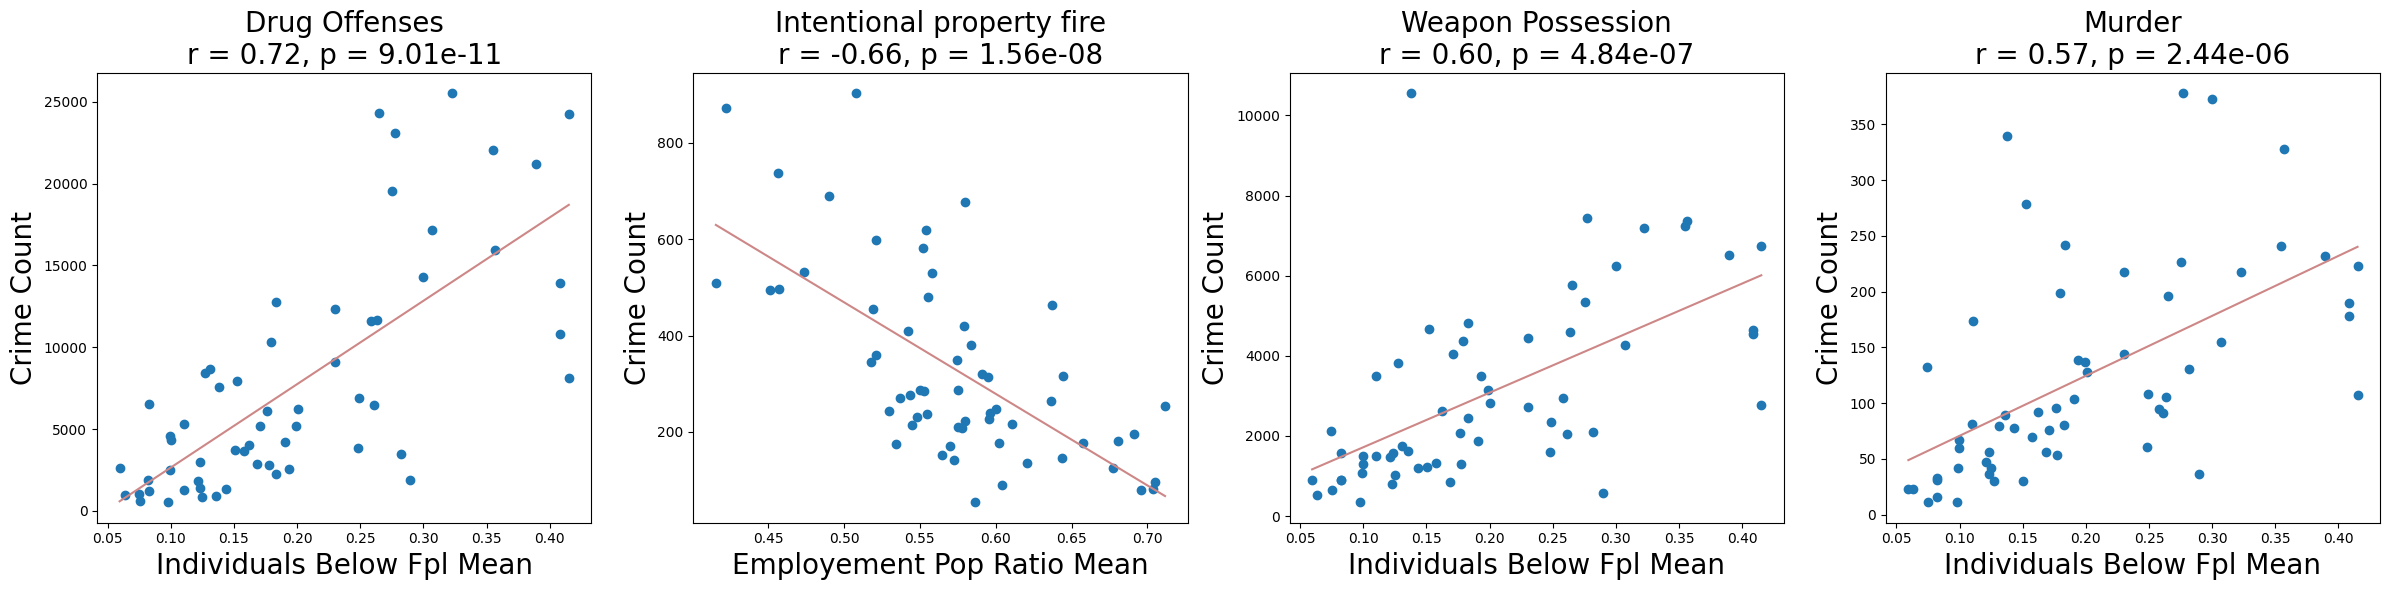

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr


color_plot = "#1f77b4"  

pairs = [
    ("Drug Offenses", "individuals_below_FPL_mean"),
    ("Intentional property fire", "Employement_pop_ratio_mean"),
    ("Weapon Possession", "individuals_below_FPL_mean"),
    ("Murder", "individuals_below_FPL_mean")
]

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

for ax, (crime, econ) in zip(axes, pairs):
    grp = df_merged[df_merged["OFNS_DESC"] == crime]
    x = grp[econ]
    y = grp["count"]
    
    # Drop missing
    mask = x.notna() & y.notna()
    x = x[mask]
    y = y[mask]
    
    # Compute Pearson r & p
    r, p = pearsonr(x, y)
    
    # Scatter plot with custom color
    ax.scatter(x, y, color=color_plot)
    
    # Regression line with pale red color
    m, b = np.polyfit(x, y, 1)
    x_line = np.array([x.min(), x.max()])
    y_line = m * x_line + b
    ax.plot(x_line, y_line, color="#cd8787")  # pale red
    
    # Titles and labels
    ax.set_title(f"{crime}\nr = {r:.2f}, p = {p:.2e}", fontsize=14)
    ax.title.set_fontsize(20)
    ax.set_xlabel(econ.replace('_', ' ').title(), fontsize=20)
    ax.set_ylabel("Crime Count", fontsize=20)

plt.tight_layout()
plt.savefig("../images/correlation_plots.png")
plt.show()
